## Lending Club Tech Challenge

### Overview
The Lending Club is an online peer-to-peer lender offtering loan trading on a secondary market.  The standard loan period is three years, and investors can search and select loans that they want to invest in based on the loan amount, loan grade, loan purpose and information about the borrower.  Lending Club's revenue comes from origination fees from borrowers and service fees from investors.  The origination fee ranges from 1.1% to 5.0% of the loan amount, and the service fee is 1% on the borrowed amount.  The Lending Club is the World's largest online marketplace connecting investors and borrowers.  As of December 31, 2016, Lending Club facilitated $24.6 loans since its launch in 2007.

### Dataset
The dataset contains Lending Club's historical loan data from 2007 to 2014.  The dataset contains information about the status of loans (ex. whether they were written off, fully, paid, etc.) and information about borrowers (annual income, employment length, etc.)

### Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import datetime
from collections import Counter

In [2]:
# load dataset
df = pd.read_csv('dataset/loanStats.csv')

C:\Users\rchae\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(466287, 68)

In [4]:
# check data quality issues
# change 'n/a' to np.nan since different wordings are used to indicate not available data
df = df.replace('n/a', np.nan, regex=True)
df.head(5)
df.columns
df.dtypes
df.shape
pd.set_option('display.max_rows', 10)
# get the total number of missing values for each column
df.isnull().sum().to_frame('null_values').sort_values('null_values', ascending=False)

,null_values
mths_since_last_record,403649
mths_since_last_major_derog,367312
desc,340318
mths_since_last_delinq,250351
next_pymnt_d,119700
...,...
member_id,0
initial_list_status,0
out_prncp,0
out_prncp_inv,0


In [5]:
# uncomment to print sample data for all columns
# print df.ix[:,:10].head(5)
# print df.ix[:,10:20].head(5)
# print df.ix[:,20:30].head(5)
# print df.ix[:,30:40].head(5)
# print df.ix[:,40:50].head(5)
# print df.ix[:,50:60].head(5)
# print df.ix[:,60:].head(5)

### Data Cleaning and Formatting
#### Column
The following columns have more than 25% of values missing:
 * mths_since_last_record: 403,649 null values.  One possibility is that this value may be null for those who do not have any public records such as bankruptcies and defaults.  Further clarification is needed from the data provider.  This data will not be used for this tech challenge.
 * mths_since_last_major_derog: 367,312 null values.  Values may be null for lenders above the rating threshold.  Further clarification needed from the data provider.  This data will not be used for this tech challenge.
 * desc: 340,318 null values.  Not much can be done to analyze this data without using NLP since each description is unique. Out of scope for this project.
 * mths_since_last_delinq: 250,351 null values.  Values may be null for lenders with no history of delinquencies.  Further clarification needed from the data provider.  This data will not be used for this tech challenge.
 * next_pymnt_d: 119,700 null values. Potentially null for those who are finished with paying off debt.  Further clarification needed from the data provider.  This data will not be used for this tech challenge.
 
#### Row
The following rows have null values:
 * 4 rows do not have payment_inc_ratio.  Since the proportion of missing rows is very small compared to the total number of rows, these rows need to be deleted if they are used for analysis.
 * 29 rows do not have open account information.  Since the proportion of missing rows is very small compared to the total number of rows, these rows need to be deleted if they are used for analysis.
 * They are many rows that had string 'n/a' instead of np.nan.  These strings were converted to np.nan so that no extra category is created for these null values when creating graphs.

#### Dates
There are 5 date columns in the dataset.  These date columns will be properly formatted before doing any date-related data analysis:
 * issue_d
 * earliest_cr_line
 * last_pymnt_d
 * last_credit_pull_d
 * final_d

In [6]:
# convert dates in a readable format
df.issue_d = pd.to_datetime(df.issue_d)
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d)
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d)
df.final_d = pd.to_datetime(df.final_d)

## Data Understanding

In [7]:
# create a dataframe containing numerical variables and a dataframe containing categorical variables
df_numerical = df[['loan_amnt','int_rate','payment_inc_ratio','dti','open_acc']]
df_categorical = df[['emp_length','home_ownership','purpose','addr_state','term']]

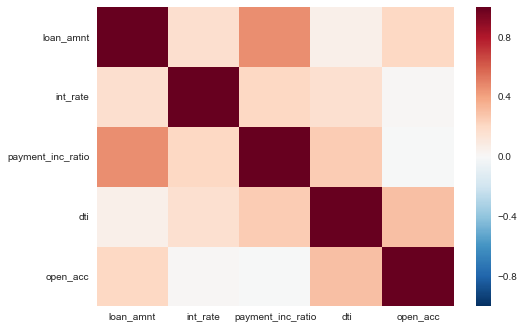

In [8]:
# heatmap to see the correlations amongst numerical variables
sns.heatmap(df_numerical.corr())

In [9]:
# delete rows with null values
df_numerical.isnull().sum()
df_numerical = df_numerical[df_numerical['payment_inc_ratio'].isnull() == False]
df_numerical = df_numerical[df_numerical['open_acc'].isnull() == False]

### Box Plots for Numerical Variables

#### Loan Amount (loan_amnt)
* Description: The listed amount of the loan applied for by the borrower.  If the credit department reduces the loan amount, the new amount will be reflected in this category.
* Data type: Integer
* Comment: The distribution has the mean of 14,317 and is skewed slightly to the right.  The maximum amount is 35,000, which seems to be the upper limit of loan provided by Lending Club.

In [10]:
print df_numerical.loan_amnt.dtype
print df_numerical['loan_amnt'].describe()

int64
count    466258.000000
mean      14317.928218
std        8286.328100
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


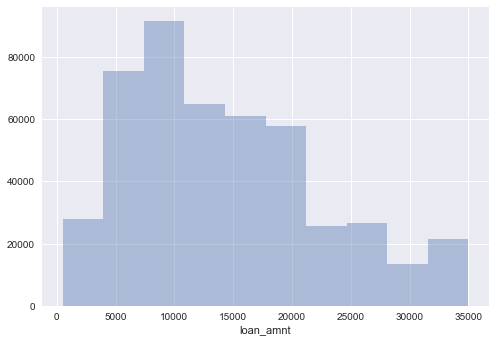

In [11]:
sns.distplot(df_numerical.loan_amnt, kde=False, bins= 10)

#### Interest Rate (int_rate)
* Description: Interest Rate represents the interest rate on the loan.  Interest rate is determined by many factors such as the total amount of loan, credit risk of the borrower, and the length of the loan.
* Data type: Float (percentage)
* Comment: The distribution is relatively normally distributed.  The mean of the interest rate is 13.8% with the standard deviation of 4.4.

In [12]:
print df_numerical.int_rate.dtype
print df_numerical['int_rate'].describe()

float64
count    466258.000000
mean         13.830451
std           4.357142
min           5.420000
25%          10.990000
50%          13.660000
75%          16.490000
max          26.060000
Name: int_rate, dtype: float64


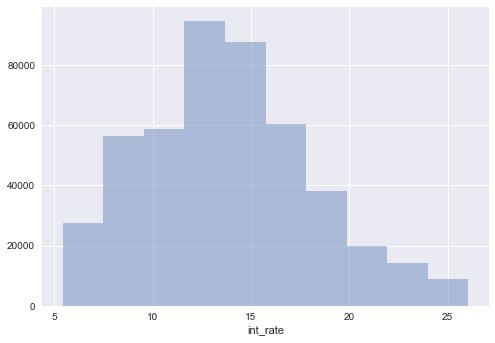

In [13]:
sns.distplot(df_numerical.int_rate, kde=False, bins= 10)

#### Payment-to-Income Ratio (payment_inc_ratio)
* Description: Payment-to-Income Ratio shows how high the payment of the borrower is relative to the income.  This ratio can be used to measure the ability of the borrower to pay back the loan.
* Data type: Float (percentage).
* Comment: The distribution is skewed heavily to the right due to outliers (ex. 54% payment-to-income ratio)  

In [14]:
print df_numerical.payment_inc_ratio.dtype
print df_numerical['payment_inc_ratio'].describe()

float64
count    466258.000000
mean          8.010669
std           4.027546
min           0.028895
25%           4.909250
50%           7.519350
75%          10.716200
max          54.171000
Name: payment_inc_ratio, dtype: float64


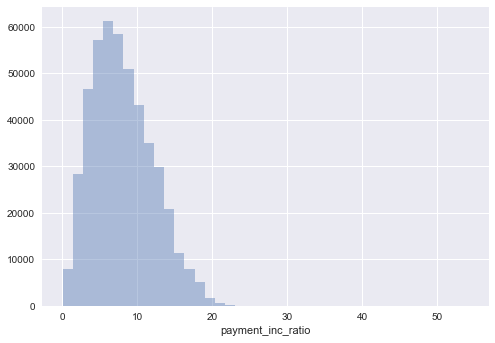

In [15]:
sns.distplot(df_numerical.payment_inc_ratio, kde=False, bins= 40)

#### Debt-to-Income Ratio (dti)
* Description: Debt-to-Income Ratio represents the borrower's total monthly debt payments on the total debt obligations divided by the borrower's income.
* Data type: Float
* Comment: The distribution is normally distributed with the mean of 17.2 and the standard deviation of 7.8.  The maximum dti in the dataset is 40.0.

In [16]:
print df_numerical.dti.dtype
print df_numerical['dti'].describe()

float64
count    466258.000000
mean         17.219336
std           7.850914
min           0.000000
25%          11.360000
50%          16.870000
75%          22.780000
max          39.990000
Name: dti, dtype: float64


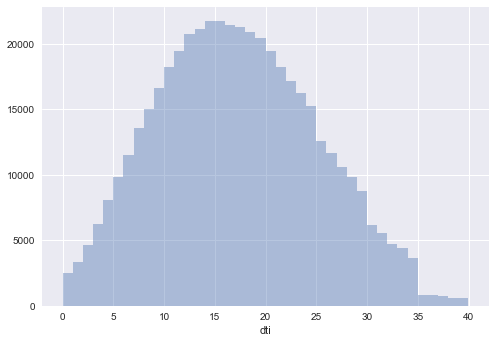

In [17]:
sns.distplot(df_numerical.dti, kde=False, bins= 40)

#### Open Account (open_acc)
* Description: Open Account represents the number of open credit lines in the borrower's credit file.  
* Datatype: Float
* Comment: The distribution is right-skewed with the mean of 11.2 and the standard deviation of 5.0.  Having more credit lines open can be a good sign since that indicates more lenders were willing to extend credit lines.  However, having an excessive number of credit lines with a high utilization rate can signal high credit risk.

In [18]:
print df_numerical.open_acc.dtype
print df_numerical['open_acc'].describe()

float64
count    466258.000000
mean         11.187060
std           4.987517
min           0.000000
25%           8.000000
50%          10.000000
75%          14.000000
max          84.000000
Name: open_acc, dtype: float64


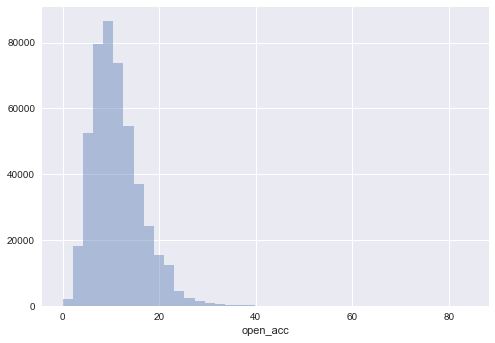

In [19]:
sns.distplot(df_numerical.open_acc, kde=False, bins= 40)

### Bar Plots for Categorical Variables

#### Employment Lengh (emp_length)
* Description: Employment Length shows for how long the borrower was being employed at the time of loan application.  Fewer years of emplyment may indicate less consistent earning.  However, it may also indicate that the borrower is young.
* Datatype: Object
* Comment: Borrowers with 10+ years of employment are lumped together in the '10+ years category'.

In [20]:
df_categorical.emp_length.dtype

dtype('O')

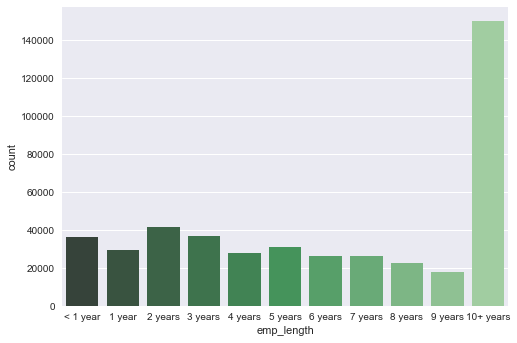

In [21]:
sns.countplot(x="emp_length", data=df_categorical, palette="Greens_d", order=['< 1 year','1 year','2 years','3 years'
            ,'4 years','5 years','6 years','7 years','8 years','9 years','10+ years'])

#### Home Ownership (home_ownership)
* Description: Home Ownership shows whether the primary residence of the borrower is owned by the borrower, is being rented, or is being mortgaged.  Borrowers who are home owners have less rent/mortgage-related payments.
* Datatype: Object
* Comment: Mortgage is the largest category, closely followed by Rent.  Relatively few borrowers own a house.

In [22]:
df_categorical.emp_length.dtype

dtype('O')

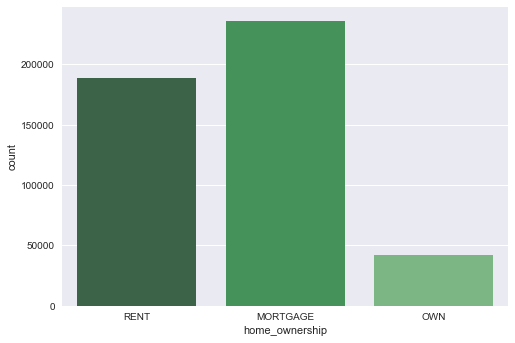

In [23]:
sns.countplot(x="home_ownership", data=df_categorical, palette="Greens_d", order=['RENT','MORTGAGE','OWN'])

#### Purpose (purpose)
* Description: Purpose shows the purpose for which the loan was approved.
* Datatype: Object
* Comment: Debt consolidation is by far the largest category, followed by Credit Card.  These two categories may represent higher risk categories since borrowers in these two categories already had high-interest debt before applying for loan at Lending Club.

In [24]:
df_categorical.purpose.dtype

dtype('O')

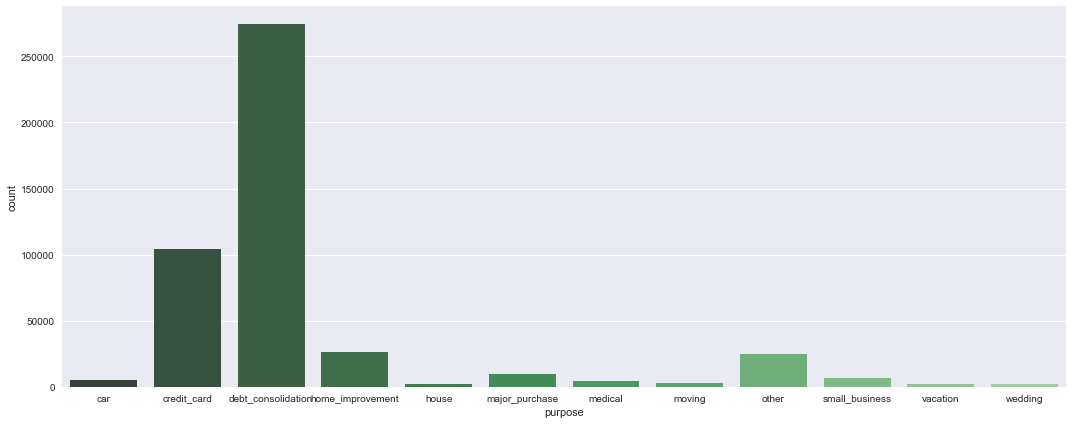

In [25]:
plt.figure(figsize=(18,7))
sns.countplot(x="purpose", data=df_categorical, palette="Greens_d", order=['car','credit_card','debt_consolidation'
        ,'home_improvement','house','major_purchase','medical','moving','other','small_business','vacation','wedding'])

#### Address State (addr_state)
* Description: Address State shows the state provided by the borrower in the loan application.
* Datatype: Object
* Comment: California, where Lending Club is headquartered, has the most borrowers by a large margin.

In [26]:
df_categorical.addr_state.dtype

dtype('O')

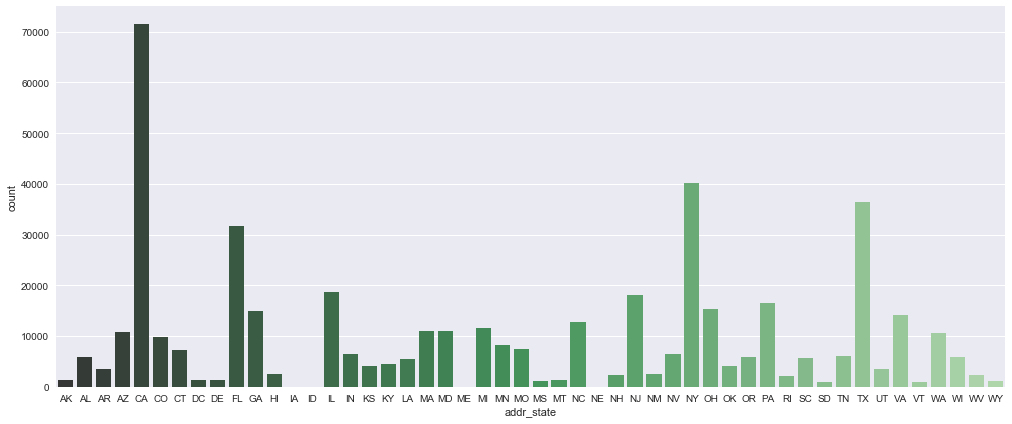

In [27]:
plt.figure(figsize=(17,7))
sns.countplot(x="addr_state", data=df_categorical, palette="Greens_d", order=['AK','AL','AR','AZ','CA','CO','CT','DC','DE'
    ,'FL','GA','HI', 'IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','NE', 'NH','NJ','NM'
    ,'NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY'])

#### Term (term)
* Description: Term represents he number of payments on the loan (36 or 60)
* Datatype: Object
* Comment: There are twice as many 36-month loans as 60-month loans.  36-month loans generally offer lower interest rate.

In [28]:
df_categorical.term.dtype

dtype('O')

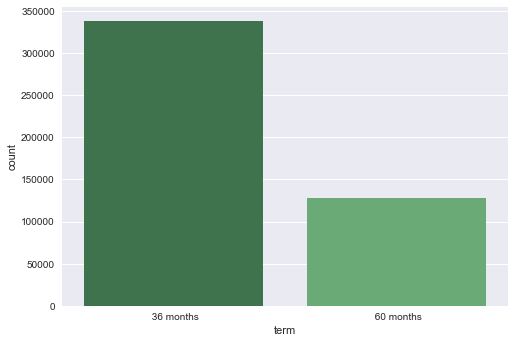

In [29]:
sns.countplot(x="term", data=df_categorical, palette="Greens_d")

### Average Loan Amount, DTI, and PTI

In [30]:
# average loan amount
print "Average Loan Amount: " + str(df['loan_amnt'].mean())
# average DTI
print "Average DTI: " + str(df['dti'].mean())
# average PTI
print "Average PTI: " + str(df['payment_inc_ratio'].mean())

Average Loan Amount: 14317.2805054
Average DTI: 17.2187468448
Average PTI: 8.01044357929


### The most common month for Issuing new Loans
October

In [31]:
# the most common month for issuing new loans
Counter(df['issue_d'].dt.month).most_common()

[(10, 63342),
 (11, 50551),
 (7, 49537),
 (8, 40636),
 (12, 36078),
 (5, 36016),
 (6, 35389),
 (4, 34787),
 (9, 33553),
 (3, 30702),
 (2, 27978),
 (1, 27718)]

### The most common day on which loans were fully paid off

In [32]:
# the most common day on which loans were fully paid off
Counter(df['issue_d'].dt.day).most_common()

[(1, 466287)]

The most common day that loans were fully paid off is the 1st of every month.  It appears that all dates are put in at a month level, and all dates are recorded as of the 1st of every month by default.  Therefore, the result offers limited insight.

### Bar graphs for Grades and Subgrades

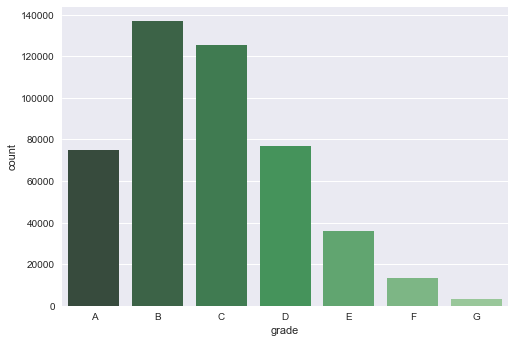

In [33]:
# a bar graph for grades
sns.countplot(x="grade", data=df, palette="Greens_d", order=['A','B','C','D','E','F','G'])

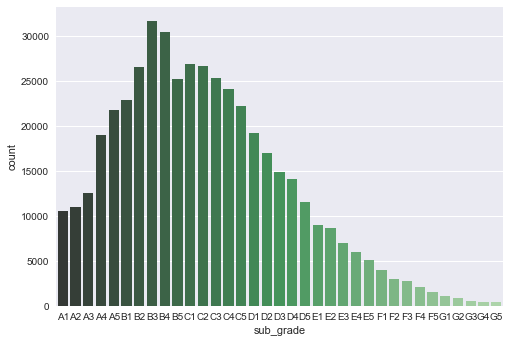

In [34]:
# a bar graph for subgrades
sns.countplot(x="sub_grade", data=df, palette="Greens_d", order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2'
    ,'C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])

The majority of Lending Club's current portfolio is loans with grade B or C.  One explanation for this is that borrowers with grade A get better interest rates from traditional banks, and borrowers with grade lower than C often do not meet the requirements for Lending Club.

### Status Variable

In [35]:
# Status variable
Counter(df['status']).most_common()

[('Current', 333472),
 ('Fully Paid', 99457),
 ('Charged Off', 22911),
 ('Late (31-120 days)', 5920),
 ('In Grace Period', 3250),
 ('Late (16-30 days)', 1038),
 ('Default', 239)]

Status Variables:
* Current - 333,472: Loan is up to date on all outstanding payments.
* Fully Paid - 99,457: Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.
* Charged Off - 22,911: Loan for which there is no longer a reasonable expectation of further payments.  Generally, Charge Off occurs no later than 30 days after the Default status is reached.
* Late (31-120 days) - 5,920: Loan has not been current for 31 to 120 days.
* In Grace Period - 3,250: Loan is past due but within the 15-day grace period.
* Late (16-30 days) - 1,038: Loan has not been current for 16 to 30 days.
* Default - 239: Loan has not been current for 121 days or more.

Source: https://help.lendingclub.com/hc/en-us/articles/215488038

'Current' and 'Fully Paid' are the largest categories, which is a good sign given that they represent on-time payment.  However, loans for which on-time payment is not made sums up to 33,358 (9% of all loans).  The delinquency rate of 9% is very high compared to delinquency rates of consumer loans of 2% at commercial banks (https://www.federalreserve.gov/releases/chargeoff/delallsa.htm).

The status of loan is important in understanding the business model of Lending Club because the status of loan has a direct impact on the revenue of the company.  Lending Club should make an attempt to optimize the risk-adjusted return by minimizing delinquencies at a optimal risk level.

In [36]:
# create a flag variable indicating whether or not a loan is bad.
df['flag'] = df.apply(lambda x: 1 if x['status'] in ['Current','Fully Paid'] else 0, axis=1)

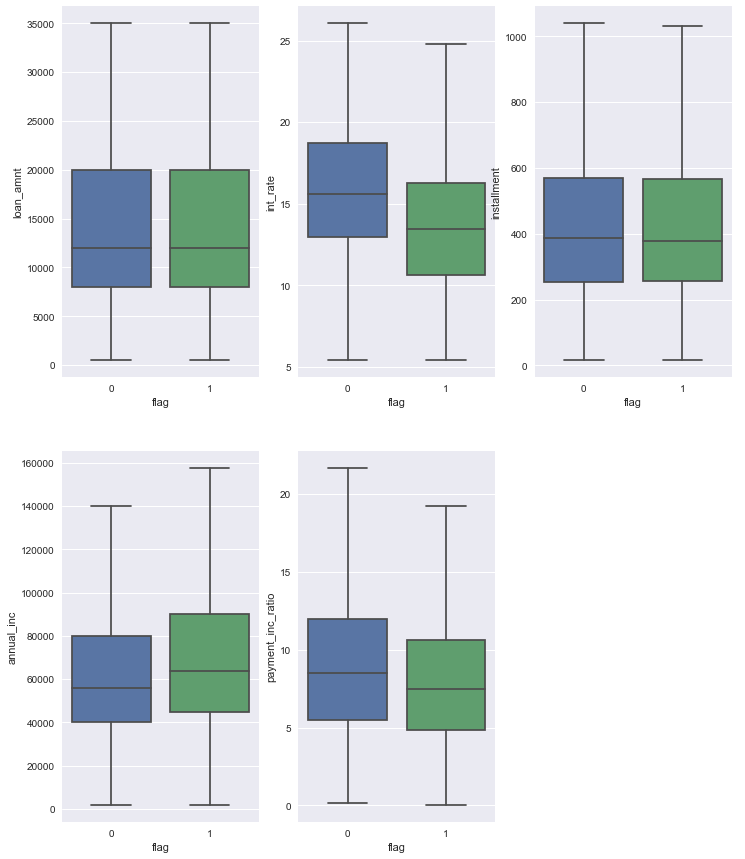

In [37]:
# boxplot comparing good loan (flag 1) and bad loan (flag 0)
fig, axs = plt.subplots(2,3,figsize=(12, 15))
axs[-1, -1].axis('off')
ax = sns.boxplot(x="flag", y="loan_amnt", data=df, ax=axs[0,0], showfliers=False)
ax = sns.boxplot(x="flag", y="int_rate", data=df, ax=axs[0,1], showfliers=False)
ax = sns.boxplot(x="flag", y="installment", data=df, ax=axs[0,2], showfliers=False)
ax = sns.boxplot(x="flag", y="annual_inc", data=df, ax=axs[1,0], showfliers=False)
ax = sns.boxplot(x="flag", y="payment_inc_ratio", data=df, ax=axs[1,1], showfliers=False)

Of the above five variables, Interest Rate(int_rate), Annual Income(annual_inc), and Payment-to-Income Ratio (payment_inc_ratio) seem to be visibly different depending on status category.  Even though correlation does not necessarily mean causation, we can make the following hypotheses on how each variable can cause loans to go bad:

Higher interest rate can have a negative impact on loan status by adding extra burden on installment.  Annual income seems to have a postive effect on loan status.  Borrowers with higher annual income have more money to pay back their loan.  High Payment-to-Income Ratio can have a negative impact on loan status because more money needs to be repaid by the borrower each month.

Loan amount(loan_amnt) and Installment(installment) were similar in flag 0 and 1.

### Conclusions

Based on Lending Club's portfolio of loans, the largest categories of loans are grades B and C.  Lending Club seems to target borrowers who are less likely to get good rates at banks but are relatively less risky.  In order to optimize it's risk-adjusted return, Lending Club can examine which factors have biggest impact on default rate.  This may mean that Lending Club will need to gather additional data not included in the current dataset.

With the reformatted date columns, we can look at how Lending Club's portfolio of loans has changed from 2007 to 2014.  With external dataset on Lending Club's stock price, we can see if there is any correlation between Lending Club's portfolio of loans and Lending Club's stock price.